<center><h1>Logistic Regression</h1></center>

# 1. Introduction

Logistic Regression is a widely used **supervised learning** algorithm for **binary classification** tasks. Unlike **Linear Regression**, which predicts continuous values, Logistic Regression is used to estimate the **probability** that a given input belongs to a particular class.

The output is a probability value between **0 and 1**, which is then converted into class labels based on a threshold (typically **0.5**).


![Logistic Regression](LogisticRegression.webp)

# 2. How Does Logistic Regression Work?

## 1. Mathematical Formulation

Logistic Regression is a classification algorithm that models the probability that a given input belongs to a particular class. It does this by applying the **sigmoid function (logistic function)** to a linear combination of the input features.

The model takes the form:

$$
P(Y=1 | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}}
$$

where:
- $ P(Y=1 | X) $ is the probability that the input belongs to class **1**.
- $ \beta_0 $ is the **intercept** (bias term).
- $ \beta_1, \beta_2, ..., \beta_n $ are the **coefficients** (weights) for the input features.
- $ X_1, X_2, ..., X_n $ are the **independent variables** (features).
- The **sigmoid function** ensures that the output is always between 0 and 1.

The decision rule for classification is:

$$
\hat{Y} =
\begin{cases}
1, & \text{if } P(Y=1 | X) \geq 0.5 \\
0, & \text{if } P(Y=1 | X) < 0.5
\end{cases}
$$

## 2. Cost Function and Optimization

To train the model, we need to find the best parameters $ \beta $ that minimize the error. Instead of using Mean Squared Error (as in Linear Regression), Logistic Regression uses the **log loss (binary cross-entropy)** cost function:

$$
J(\beta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

where:
- $ m $ is the **number of training samples**.
- $ y_i $ is the **actual class label** (0 or 1).
- $ \hat{y}_i $ is the **predicted probability** from the logistic function.

To minimize this cost function, we typically use **Gradient Descent**, which updates the model parameters iteratively:

$$
\beta_j := \beta_j - \alpha \frac{\partial J}{\partial \beta_j}
$$

where $ \alpha $ is the **learning rate**, which controls how much the weights are updated in each step.

## 3. Regularization

To prevent overfitting, Logistic Regression often includes **L1 (Lasso) or L2 (Ridge) regularization**:
- **L1 Regularization (Lasso)** adds a penalty term $ \lambda \sum |\beta_j| $, which encourages sparsity (some coefficients become zero).
- **L2 Regularization (Ridge)** adds a penalty term $ \lambda \sum \beta_j^2 $, which discourages large coefficients.

Regularization helps improve the generalization of the model to unseen data.

---


# 3. About the Social Network Ads Dataset

## Description:
This dataset is designed for analyzing the behavior of users interacting with an online social network, with the goal of predicting whether a user will purchase a product based on features like gender, age, and estimated salary. The dataset consists of multiple user records with various attributes, and the target variable indicates whether the user made a purchase.

## Variables:
1. **User ID**: A unique identifier for each user.
2. **Gender**: The gender of the user, which can be either 'Male' or 'Female'.
3. **Age**: The age of the user, which is a continuous variable.
4. **EstimatedSalary**: The estimated annual salary of the user, which is a continuous variable.

## Target Variable:
- **Purchased**: A binary target variable indicating whether the user made a purchase (1 = Yes, 0 = No).

## Objective:
The objective of this dataset is to use the features (Gender, Age, EstimatedSalary) to predict the target variable "Purchased." Specifically, the goal is to build a model that predicts whether a user will purchase a product based on their personal information and interactions with the social network.

---


# 4. Steps to Apply Logistic Regression Algorithm to Social Network Ads Dataset

## 1. Data Loading and Exploration
   - **Objective**: Load the dataset and explore its structure.
   - Steps:
     - Import necessary libraries (e.g., pandas, numpy).
     - Load the dataset using pandas.
     - Display the first few rows to get an overview of the data.
     - Check for missing values and handle them appropriately.
     - Explore the data types of each column and make necessary conversions.

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

# Step 2: Load the dataset using pandas
df = pd.read_csv('Social_Network_Ads.csv')

# Step 3: Display the first few rows to get an overview of the data
print("First few rows of the dataset:")
print(df.head())

# Step 4: Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Step 5: Explore the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Step 6: Convert 'Gender' column to numerical values (e.g., Male = 0, Female = 1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Display the updated dataset
print("\nUpdated dataset after converting 'Gender' column:")
print(df.head())


First few rows of the dataset:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Missing values in each column:
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Data types of each column:
User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

Updated dataset after converting 'Gender' column:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       0   19            19000          0
1  15810944       0   35            20000          0
2  15668575       1   26            43000          0
3  15603246       1   27            57000          0
4  15804002  

## 2. Data Preprocessing
   - **Objective**: Clean the data and prepare it for model training.
   - Steps:
     - Convert categorical columns (like "Gender") into numerical values using encoding techniques (e.g., one-hot encoding or label encoding).
     - Feature scaling: Normalize or standardize the features (Age, EstimatedSalary) if necessary.
     - Split the data into features (X) and target (y) variables.
     - Split the dataset into training and test sets (e.g., 80% training, 20% test).


In [3]:
# Step 1: Convert categorical columns (like "Gender") into numerical values using label encoding
# We have already done label encoding for the "Gender" column in the previous step.
# If you wanted to use One-Hot Encoding, you could do it like this:
# df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Step 2: Feature scaling: Normalize or standardize the features (Age, EstimatedSalary)
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Selecting the features (Age and EstimatedSalary) for scaling
df[['Age', 'EstimatedSalary']] = scaler.fit_transform(df[['Age', 'EstimatedSalary']])

# Step 3: Split the data into features (X) and target (y) variables
X = df[['Gender', 'Age', 'EstimatedSalary']]  # Features (Gender, Age, EstimatedSalary)
y = df['Purchased']  # Target variable (Purchased)

# Step 4: Split the dataset into training and test sets (e.g., 80% training, 20% test)
from sklearn.model_selection import train_test_split

# Split the data: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets to confirm
print("\nTraining and test set shapes:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



Training and test set shapes:
X_train shape: (320, 3)
X_test shape: (80, 3)
y_train shape: (320,)
y_test shape: (80,)


## 3. Model Building
   - **Objective**: Build the logistic regression model.
   - Steps:
     - Import the logistic regression model from a library (e.g., `LogisticRegression` from `sklearn`).
     - Instantiate the model.
     - Train the model using the training data.


In [4]:
# Step 1: Import the Logistic Regression model from sklearn
from sklearn.linear_model import LogisticRegression

# Step 2: Instantiate the Logistic Regression model
model = LogisticRegression(random_state=42)

# Step 3: Train the model using the training data
model.fit(X_train, y_train)

# Display the model's coefficients (optional) to see the learned weights
print("\nLogistic Regression Model Coefficients:")
print(model.coef_)



Logistic Regression Model Coefficients:
[[-0.25765533  2.03630433  1.13217564]]


## 4. Model Evaluation
   - **Objective**: Evaluate the performance of the trained model.
   - Steps:
     - Use the trained model to make predictions on the test data.
     - Calculate accuracy, precision, recall, F1-score, and confusion matrix to assess model performance.
     - Visualize the results (e.g., plot confusion matrix or ROC curve).



In [6]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



Model Evaluation Metrics:
Accuracy: 0.8875
Precision: 0.9130
Recall: 0.7500
F1 Score: 0.8235


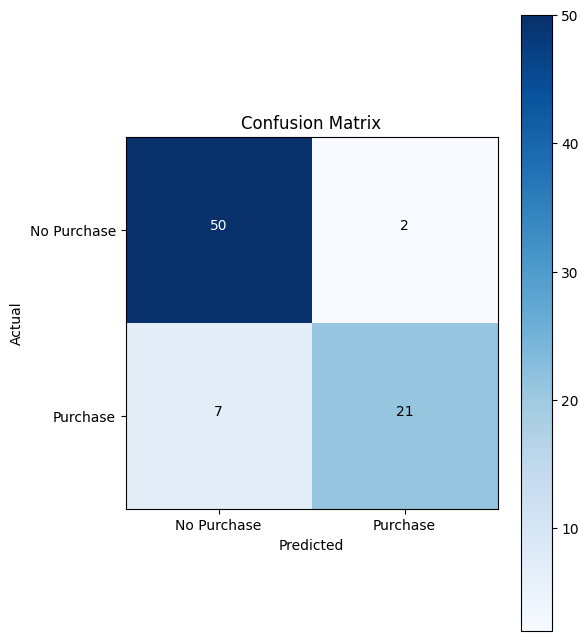

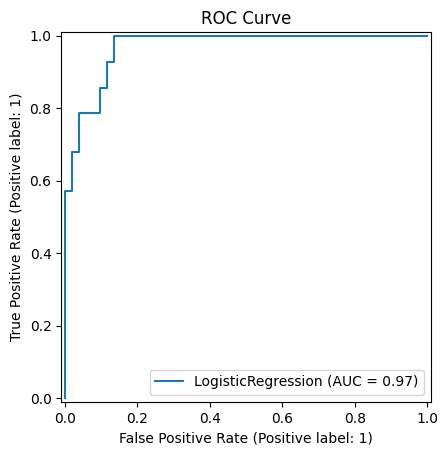

In [9]:
# Step 1: Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt

# Step 2: Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Step 3: Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Step 4: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using matplotlib
plt.figure(figsize=(6, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ["No Purchase", "Purchase"])
plt.yticks([0, 1], ["No Purchase", "Purchase"])

# Annotate the matrix with the numbers
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()

# Step 5: Plot the ROC curve using RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()


## 6. Results Interpretation
   - **Objective**: Analyze the model's predictions and insights.
   - Steps:
     - Analyze the coefficients of the logistic regression model to understand the influence of each feature.
     - Interpret the results in terms of business or practical use (e.g., which factors are most likely to predict a purchase).


1. **Accuracy: 0.8875**
   - This means that 88.75% of the model’s predictions were correct. Accuracy is a good overall indicator, but it may not be the best metric for imbalanced datasets (where one class is much more frequent than the other).

2. **Precision: 0.9130**
   - Precision measures how many of the predicted positive cases (purchases) were actually correct. A precision of 91.30% means that, when the model predicted a purchase, it was correct 91.3% of the time. High precision means fewer false positives.

3. **Recall: 0.7500**
   - Recall measures how many of the actual positive cases were correctly identified. A recall of 75.00% means that 75% of all the actual purchases were correctly identified by the model. High recall means fewer false negatives.

4. **F1 Score: 0.8235**
   - The F1 score is the harmonic mean of precision and recall. An F1 score of 82.35% indicates a balanced performance between precision and recall. It’s useful when one wants to balance both false positives and false negatives.

### Summary:

- The model has **high precision** (good at correctly identifying positive cases when it predicts them), but the **recall** is a bit lower, indicating that some actual purchases were missed.
- The **F1 score** of 0.8235 shows a good overall balance between precision and recall, indicating decent performance for the binary classification task.

In general, the model seems to perform well, but improving recall might be valuable if identifying more true positives (purchases) is important in the given business context.
